## DataCamp Python For Finance: Algorithmic Trading Implementation
Ref: <br>
__[DataCamp Blog](https://www.datacamp.com/community/tutorials/finance-python-trading#gs.BRTAO0U)__ <br>
__[Adj. Close Definition](http://www.investopedia.com/terms/a/adjusted_closing_price.asp)__ <br>
__[Adj. Close Calculation](http://www.investopedia.com/ask/answers/06/adjustedclosingprice.asp)__

In [ ]:
%matplotlib inline

import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

import numpy as np
import pandas as pd

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))

### Plot the closing price of Apple

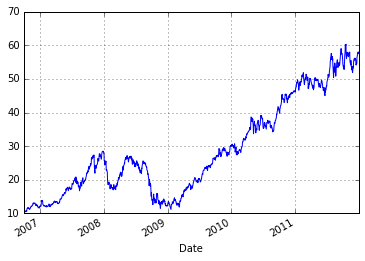

In [85]:
aapl['Close'].plot(grid=True)

plt.show()

### Calculate the daily closing price change and log returns

In [101]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017396
2006-10-05  -0.007323
2006-10-06  -0.008186
2006-10-09   0.005509
2006-10-10  -0.011049
2006-10-11  -0.007889
2006-10-12   0.027344
2006-10-13  -0.003194
2006-10-16   0.005052
2006-10-17  -0.014831
2006-10-18   0.003225
2006-10-19   0.058120
2006-10-20   0.012080
2006-10-23   0.018711
2006-10-24  -0.005046
2006-10-25   0.007743
2006-10-26   0.006225
2006-10-27  -0.021895
2006-10-30   0.000124
2006-10-31   0.008174
2006-11-01  -0.023965
2006-11-02  -0.002277
2006-11-03  -0.008775
2006-11-06   0.017975
2006-11-07   0.009986
2006-11-08   0.023811
2006-11-09   0.010737
2006-11-10  -0.002643
...               ...
2011-11-17  -0.019314
2011-11-18  -0.006566
2011-11-21  -0.015942
2011-11-22   0.020121
2011-11-23  -0.025610
2011-11-25  -0.009363
2011-11-28   0.033936
2011-11-29  -0.007794
2011-11-30   0.023829
2011-12-01   0.014881
2011-12-02   0.004553
2011-12-05   0.008458
2011-12-06

### Plot the distribution of daily price change

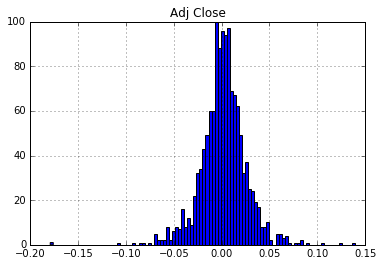

         Adj Close
count  1323.000000
mean      0.001565
std       0.023983
min      -0.179195
25%      -0.010661
50%       0.001646
75%       0.014285
max       0.139050


In [111]:
# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=100)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

            Adj Close
Date                 
2006-10-02   1.000000
2006-10-03   0.989580
2006-10-04   1.006946
2006-10-05   0.999599
2006-10-06   0.991451
2006-10-09   0.996927
2006-10-10   0.985973
2006-10-11   0.978226
2006-10-12   1.005343
2006-10-13   1.002137
2006-10-16   1.007213
2006-10-17   0.992386
2006-10-18   0.995591
2006-10-19   1.055170
2006-10-20   1.067993
2006-10-23   1.088164
2006-10-24   1.082687
2006-10-25   1.091103
2006-10-26   1.097916
2006-10-27   1.074138
2006-10-30   1.074272
2006-10-31   1.083088
2006-11-01   1.057441
2006-11-02   1.055036
2006-11-03   1.045819
2006-11-06   1.064788
2006-11-07   1.075474
2006-11-08   1.101389
2006-11-09   1.113278
2006-11-10   1.110339
...               ...
2011-11-17   5.041544
2011-11-18   5.008548
2011-11-21   4.929334
2011-11-22   5.029521
2011-11-23   4.902350
2011-11-25   4.856665
2011-11-28   5.024311
2011-11-29   4.985306
2011-11-30   5.105529
2011-12-01   5.182072
2011-12-02   5.205717
2011-12-05   5.249933
2011-12-06

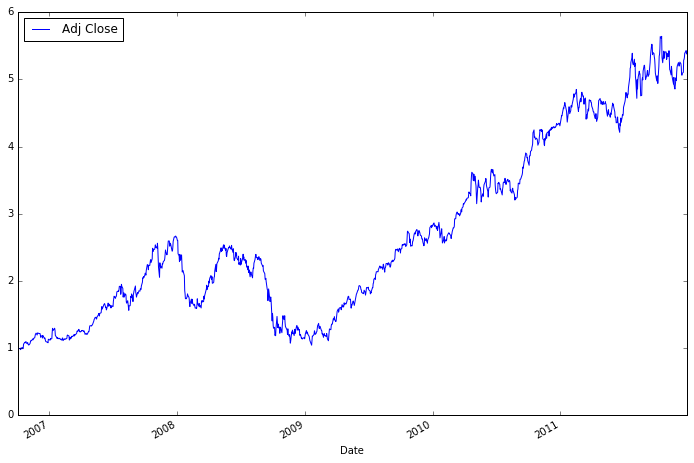

In [124]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

### Get all the data and store into one DataFrame

In [135]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))

### Some investigation such as distributions and standard deviation of each stock

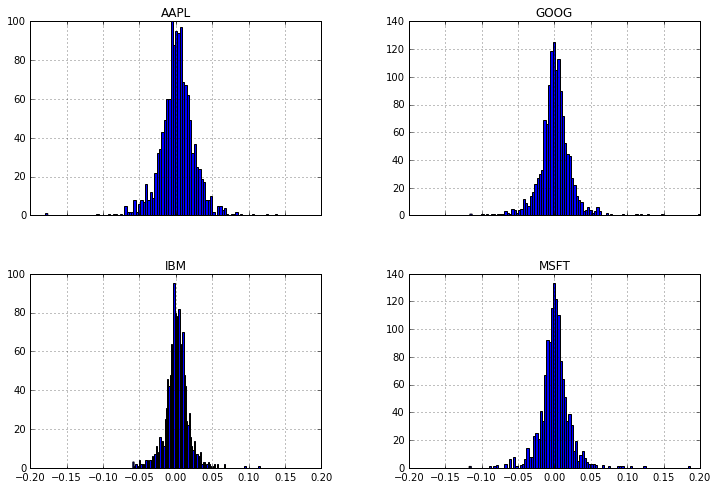

In [152]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=100, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

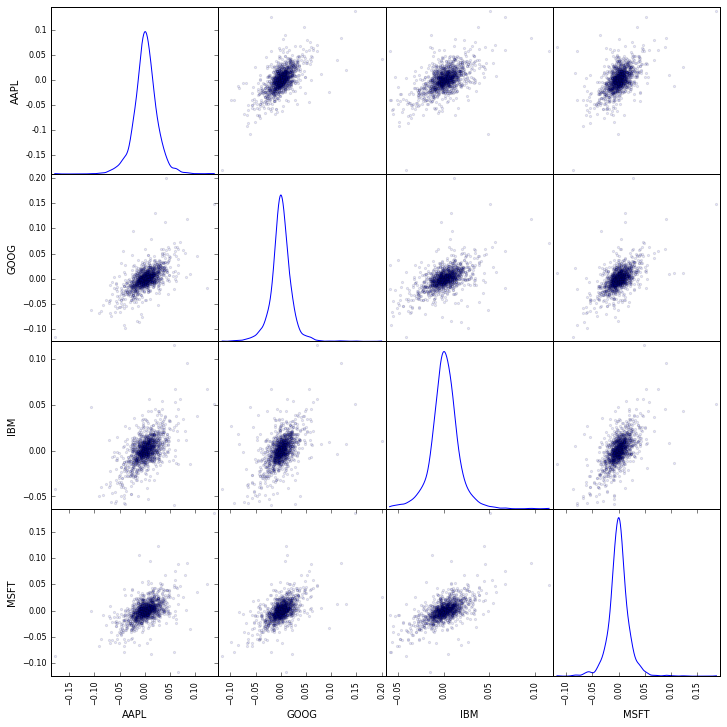

In [187]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

Rolling [window=75,center=False,axis=0]
<class 'pandas.core.frame.DataFrame'>


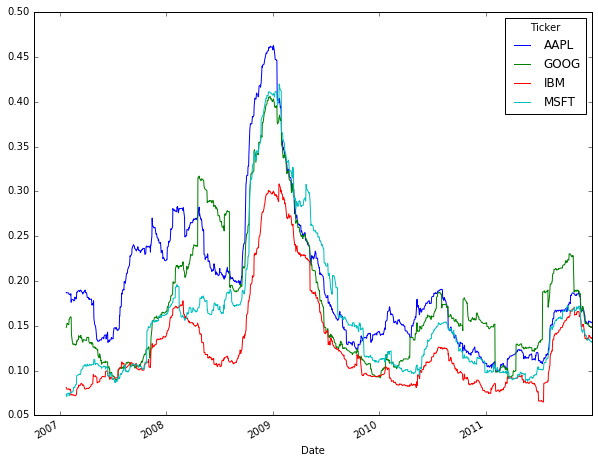

In [327]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

print(daily_pct_change.rolling(min_periods))

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

### A simple plot of Adj. Close, MA(5) and MA(10) of AAPL

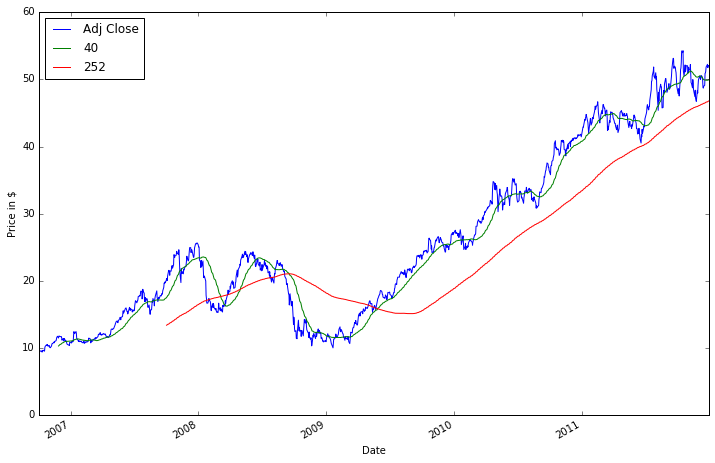

In [334]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Short moving window rolling mean
aapl['40'] = aapl['Adj Close'].rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = aapl['Adj Close'].rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '40', '252']].plot(ax=ax1)

# Show plot
plt.show()

## Simple Trading Strategy (SMA Crossover)

In [312]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg  long_mavg  positions
Date                                                
2006-10-02     0.0   10.694285  10.694285        NaN
2006-10-03     0.0   10.638571  10.638571        0.0
2006-10-04     0.0   10.681905  10.681905        0.0
2006-10-05     0.0   10.683929  10.683929        0.0
2006-10-06     0.0   10.667714  10.667714        0.0
2006-10-09     0.0   10.666667  10.666667        0.0
2006-10-10     0.0   10.649184  10.649184        0.0
2006-10-11     0.0   10.625714  10.625714        0.0
2006-10-12     0.0   10.639683  10.639683        0.0
2006-10-13     0.0   10.647429  10.647429        0.0
2006-10-16     0.0   10.658701  10.658701        0.0
2006-10-17     0.0   10.654881  10.654881        0.0
2006-10-18     0.0   10.654286  10.654286        0.0
2006-10-19     0.0   10.699286  10.699286        0.0
2006-10-20     0.0   10.747429  10.747429        0.0
2006-10-23     0.0   10.803036  10.803036        0.0
2006-10-24     0.0   10.848655  10.848655     

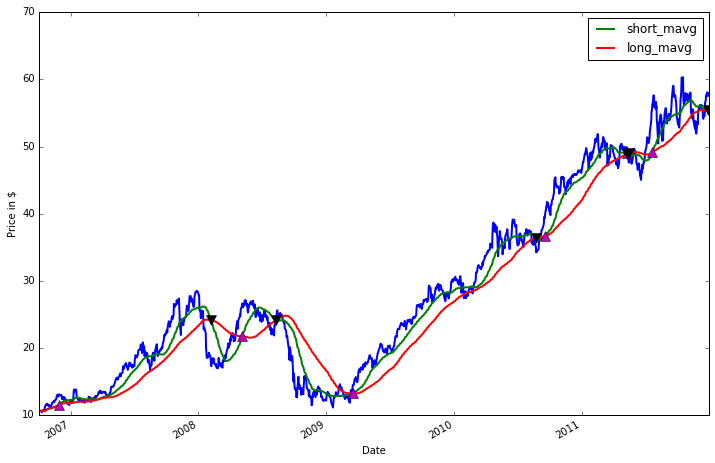

In [313]:
# Initialize the plot figure
fig = plt.figure(figsize=(12,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

## Blacktest

In [321]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio)

                 AAPL   holdings         cash        total   returns
Date                                                                
2006-10-02     0.0000     0.0000  100000.0000  100000.0000       NaN
2006-10-03     0.0000     0.0000  100000.0000  100000.0000  0.000000
2006-10-04     0.0000     0.0000  100000.0000  100000.0000  0.000000
2006-10-05     0.0000     0.0000  100000.0000  100000.0000  0.000000
2006-10-06     0.0000     0.0000  100000.0000  100000.0000  0.000000
2006-10-09     0.0000     0.0000  100000.0000  100000.0000  0.000000
2006-10-10     0.0000     0.0000  100000.0000  100000.0000  0.000000
2006-10-11     0.0000     0.0000  100000.0000  100000.0000  0.000000
2006-10-12     0.0000     0.0000  100000.0000  100000.0000  0.000000
2006-10-13     0.0000     0.0000  100000.0000  100000.0000  0.000000
2006-10-16     0.0000     0.0000  100000.0000  100000.0000  0.000000
2006-10-17     0.0000     0.0000  100000.0000  100000.0000  0.000000
2006-10-18     0.0000     0.0000  

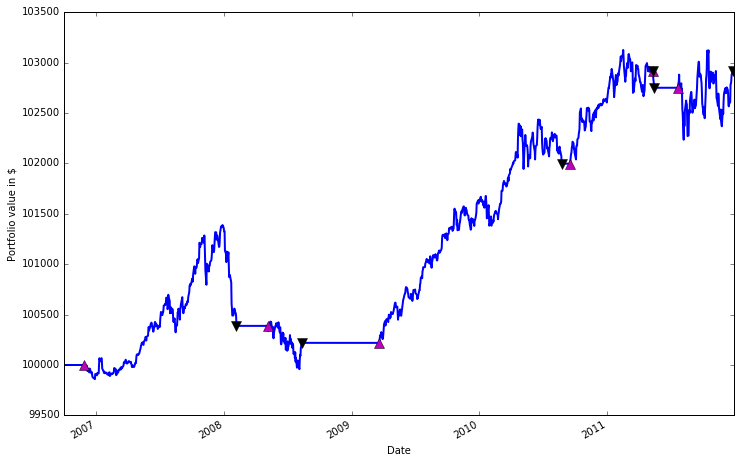

In [316]:
# Create a figure
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

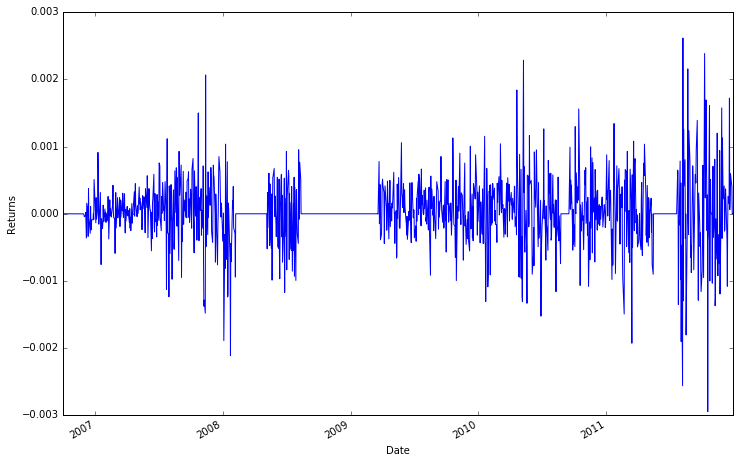

In [331]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111, ylabel='Returns')
portfolio['returns'].plot(ax=ax1)
plt.show()